In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("D:\GitHub\Geology-Data-Analyst\Reservoir Engineering Series")
import utilities
from function import laverett
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
#importing table or dataset of capillary pressure sets
df = pd.read_csv("data\Table 1.1 Capillary Pressure Sets Example.csv")
df

,sw,pc_1,pc_2,pc_3,pc_4
0,15,93.59,28.34,12.82,6.94
1,16,66.48,20.13,9.10,4.93
2,17,46.54,14.09,6.37,3.45
3,18,39.89,12.08,5.46,2.96
4,19,33.24,10.06,4.55,2.47
5,20,31.82,9.63,4.36,2.36
6,25,22.46,6.80,3.08,1.67
7,30,16.85,5.10,2.31,1.25
8,35,13.10,3.97,1.79,0.97
9,40,11.23,3.40,1.54,0.83


In [6]:
#declare parameters for calculation purpose
sigma = 72 #dynes/cm (need to convert to psi/cm)
theta = 45 #deg (in calculation this value convert in radian)
poro = [0.08, 0.11, 0.15, 0.22] #porosity every cores, shows in table
k = [1, 15, 100, 500] #md (need to convert to cm)
k_convert = []

#converting sigma
sigma_converted = utilities.dyne_cm_to_psi_cm(sigma)

#converting permeabilities first
for i in k:
    convert = utilities.milidarcy_to_micro_m2(i) * 1E-8
    k_convert.append(convert)


In [7]:
#calculated J Function
calculated  = laverett.Jfunction(dataframe=df, sigma=sigma_converted, theta=theta, k=k_convert, poro=poro)
print("calculating J funtion is done..\n")
print("showing table after calculation\n", calculated)

calculating J funtion is done..

showing table after calculation
      sw   pc_1   pc_2   pc_3  pc_4       J_1       J_2       J_3       J_4
0    15  93.59  28.34  12.82  6.94  1.407757  1.407966  1.408269  1.407590
1    16  66.48  20.13   9.10  4.93  0.999975  1.000083  0.999629  0.999917
2    17  46.54  14.09   6.37  3.45  0.700043  0.700009  0.699740  0.699739
3    18  39.89  12.08   5.46  2.96  0.600015  0.600149  0.599778  0.600356
4    19  33.24  10.06   4.55  2.47  0.499988  0.499793  0.499815  0.500972
5    20  31.82   9.63   4.36  2.36  0.478628  0.478430  0.478943  0.478662
6    25  22.46   6.80   3.08  1.67  0.337838  0.337832  0.338336  0.338714
7    30  16.85   5.10   2.31  1.25  0.253453  0.253374  0.253752  0.253529
8    35  13.10   3.97   1.79  0.97  0.197047  0.197235  0.196630  0.196738
9    40  11.23   3.40   1.54  0.83  0.168919  0.168916  0.169168  0.168343
10   50   7.49   2.27   1.03  0.56  0.112663  0.112776  0.113145  0.113581
11   60   6.55   1.98   0.90  0.49

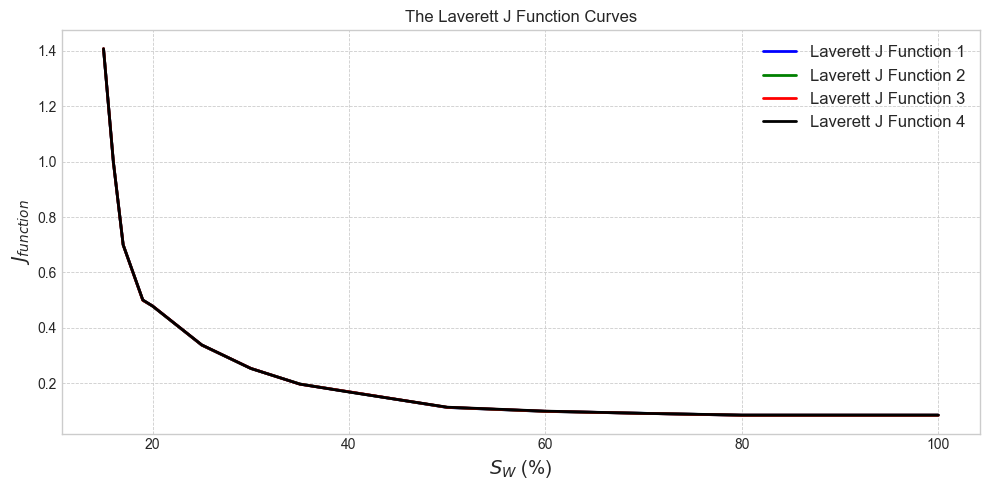

In [8]:
#plotting laveret function results
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(1, figsize=(10,5), dpi=100)
ax.plot(calculated["sw"], calculated["J_1"], label=r'Laverett J Function 1', linewidth=2, color='blue')
ax.plot(calculated["sw"], calculated["J_2"], label=r'Laverett J Function 2', linewidth=2, color='green')
ax.plot(calculated["sw"], calculated["J_3"], label=r'Laverett J Function 3', linewidth=2, color='red')
ax.plot(calculated["sw"], calculated["J_4"], label=r'Laverett J Function 4', linewidth=2, color='black')

ax.set_xlabel(r'$S_W$ (%)', fontsize=14)
ax.set_ylabel(r'$J_{function}$', fontsize=14)
ax.grid(True, which='both', linestyle='--', linewidth=0.6)
ax.legend(fontsize=12, loc='best')
ax.set_title("The Laverett J Function Curves")

fig.tight_layout()
#fig.savefig("Reservoir Engineering Series\Rock and Fluid Properties\output\Laverett J Function Curves.png", dpi=100)

plt.show()